# Yulu - Hypothesis Testing

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind,chi2_contingency,levene,kruskal,f_oneway
from statsmodels.graphics.gofplots import qqplot

In [169]:
df=pd.read_csv('yulu.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [171]:
#conversion of categorical attributes to 'category'
df[['season','holiday','workingday','weather']]=df[['season','holiday','workingday','weather']].astype('str')

In [135]:
#season category
df['season'] = df['season'].str.strip()
df['season'] = df['season'].apply(lambda x: 'spring' if x == '1'
                                  else ('summer' if x == '2' else ('fall' if x == '3' else 'winter')))
print(df['season'].unique())

['spring' 'summer' 'fall' 'winter']


In [172]:
#weather category
df['weather'] = df['weather'].str.strip()
df['weather']=df['weather'].apply(lambda x: 'Clear, Few clouds, partly cloudy' if x=='1'
else('Mist + Cloudy, Mist + Broken clouds,Mist + Few clouds,Mist'
if x=='2' else('Light Snow,Light Rain + Thunderstorm + Scattered clouds,Light Rain + Scattered clouds'
if x=='3' else 'Heavy Rain + Ice Pallets + Thunderstorm + Mist,Snow + Fog')))
print(df['weather'].unique())

['Clear, Few clouds, partly cloudy'
 'Mist + Cloudy, Mist + Broken clouds,Mist + Few clouds,Mist'
 'Light Snow,Light Rain + Thunderstorm + Scattered clouds,Light Rain + Scattered clouds'
 'Heavy Rain + Ice Pallets + Thunderstorm + Mist,Snow + Fog']


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  object 
 2   holiday     10886 non-null  object 
 3   workingday  10886 non-null  object 
 4   weather     10886 non-null  object 
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1020.7+ KB


###There is no null values in the date

In [138]:
#summary
df.describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [139]:
df.describe(include=object)

,datetime,season,holiday,workingday,weather
count,10886,10886,10886,10886,10886
unique,10886,4,2,2,4
top,2011-01-01 00:00:00,winter,0,1,"Clear, Few clouds, partly cloudy"
freq,1,2734,10575,7412,7192


#Univariate Analysis

<Axes: xlabel='temp', ylabel='Count'>

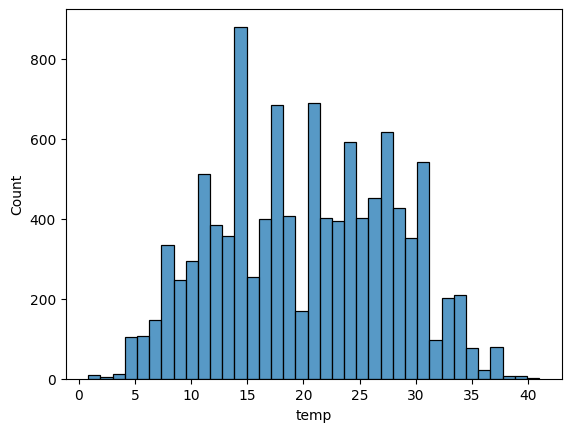

In [140]:
sns.histplot(x='temp',data=df)

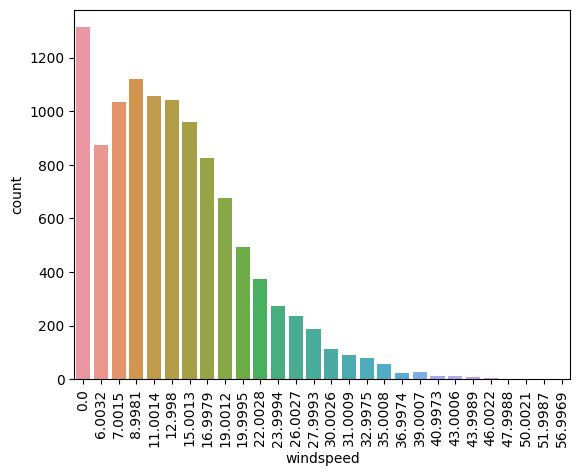

In [141]:
sns.countplot(x='windspeed',data=df)
plt.xticks(rotation=90)
plt.show()

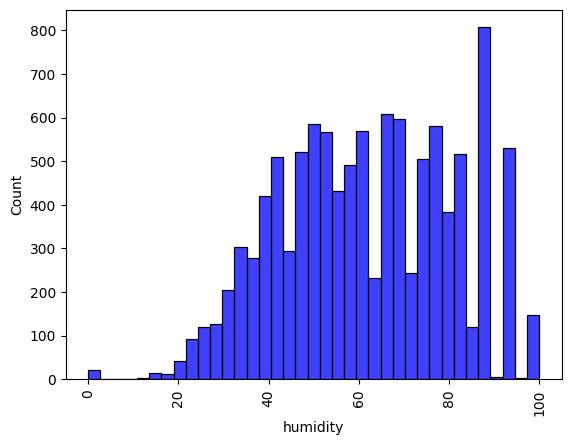

In [142]:
sns.histplot(x='humidity',data=df,color='b')
plt.xticks(rotation=90)
plt.show()

#Bivariate Analysis

In [143]:
#Relation between working day and count
workday=df.groupby('workingday')['count'].sum().reset_index()
workday

,workingday,count
0,0,654872
1,1,1430604


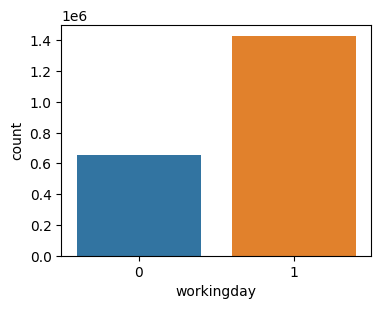

In [144]:
fig=plt.figure(figsize=(4,3))
sns.barplot(x='workingday',y='count',data=workday,width=0.8)
plt.show()

**So from graph we can conclude that during weekday the count of rental bikes are high

In [145]:
#Relation between weather and count
df_weather=df.groupby('weather')['count'].sum().reset_index()
df_weather

,weather,count
0,"Clear, Few clouds, partly cloudy",1476063
1,Heavy Rain + Ice Pallets + Thunderstorm + Mist...,164
2,"Light Snow, Light Rain + Thunderstorm + Scatte...",102089
3,"Mist + Cloudy, Mist + Broken clouds,Mist + Few...",507160


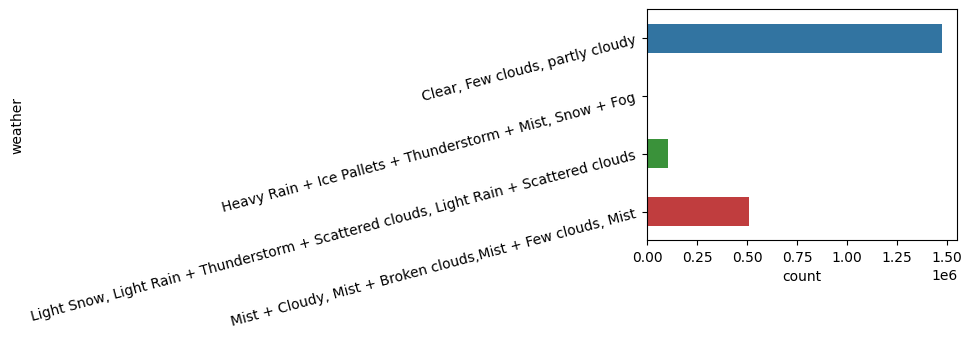

In [146]:
fig=plt.figure(figsize=(4,3))
sns.barplot(y='weather',x='count',data=df_weather,width=0.5)
plt.yticks(rotation=15)
plt.show()

**so from above we can see that,no rain or partly cloudy has more number of rental bikes...

In [147]:
#Relation between season and count
df_season=df.groupby('season')['count'].sum().reset_index()
df_season

,season,count
0,fall,640662
1,spring,312498
2,summer,588282
3,winter,544034


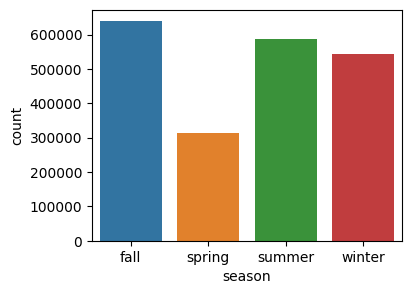

In [148]:
fig=plt.figure(figsize=(4,3))
sns.barplot(x='season',y='count',data=df_season,width=0.8)
plt.show()

**so from above we can see that,during fall,summer,winter have high demand

#Testing
---Level of significance-95%

## 1)Checking wheather Working Day has an effect on the number of electric cycles rented

# Ttest

In [149]:
#h0:There is no significance difference between working and number of electric cycles rented
#ha:There is a significance difference between working and number of electric cycles rented
holiday=df[df['workingday']=='0']['count']
workday=df[df['workingday']=='1']['count']
t_statistic,p_val=ttest_ind(workday,holiday)
print('statistic:',t_statistic,'p_value:',p_val)
if p_val>0.05:
  print('Accept H0,There is no significance difference between working and number of electric cycles rented')
else:
   print('Reject H0,There is a significance difference between working and number of electric cycles rented')

statistic: 1.2096277376026694 p_value: 0.22644804226361348
Accept H0,There is no significance difference between working and number of electric cycles rented


***so from above test we can conclude that working day has no effect on number of electric cycles rented

## 2)Check if no. of cycles rented is similar or different in different seasons

In [150]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,spring,0,0,"Clear, Few clouds, partly cloudy",9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,spring,0,0,"Clear, Few clouds, partly cloudy",9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,spring,0,0,"Clear, Few clouds, partly cloudy",9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,spring,0,0,"Clear, Few clouds, partly cloudy",9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,spring,0,0,"Clear, Few clouds, partly cloudy",9.84,14.395,75,0.0,0,1,1


#Anova test

In [151]:
df.groupby('season')['count'].sum()

season
fall      640662
spring    312498
summer    588282
winter    544034
Name: count, dtype: int64

## #Test whether data is guassian or not

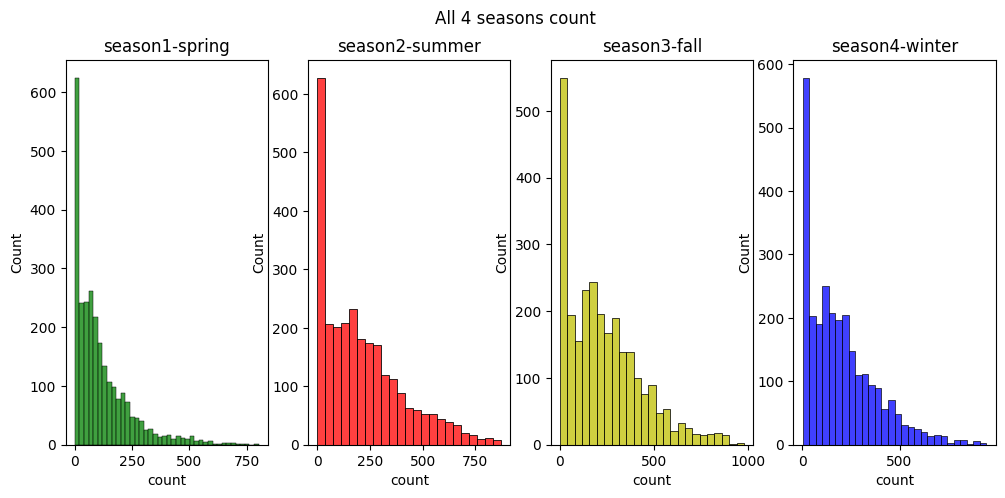

In [152]:
season_1 = df[df['season'] == 'spring']['count']
season_2 = df[df['season'] == 'summer']['count']
season_3 = df[df['season'] == 'fall']['count']
season_4 = df[df['season'] == 'winter']['count']
fig=plt.figure(figsize=(12,5))
plt.subplot(1,4,1)
sns.histplot(season_1,color='g')
plt.title('season1-spring')
plt.subplot(1,4,2)
sns.histplot(season_2,color='r')
plt.title('season2-summer')
plt.subplot(1,4,3)
sns.histplot(season_3,color='y')
plt.title('season3-fall')
plt.subplot(1,4,4)
sns.histplot(season_4,color='b')
plt.title('season4-winter')
plt.suptitle('All 4 seasons count')
plt.show()

****From above plots we can see that the data points are leftly skewed and they are not normally distributed/guassian distribution

# #qqplot

Text(0.5, 1.0, 'Season 1 QQ Plot')

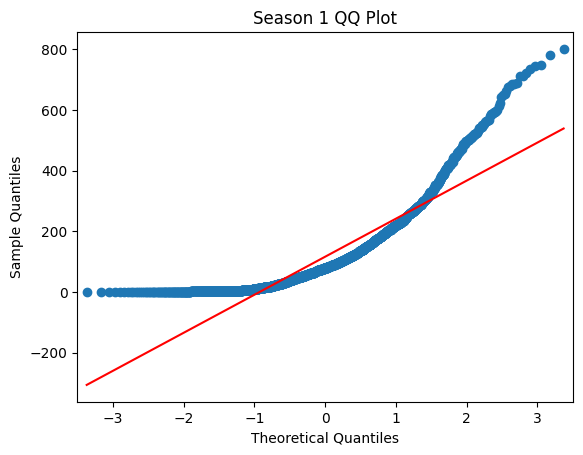

In [153]:
qqplot(season_1, line='s')
plt.title('Season 1 QQ Plot')

<Figure size 400x300 with 0 Axes>

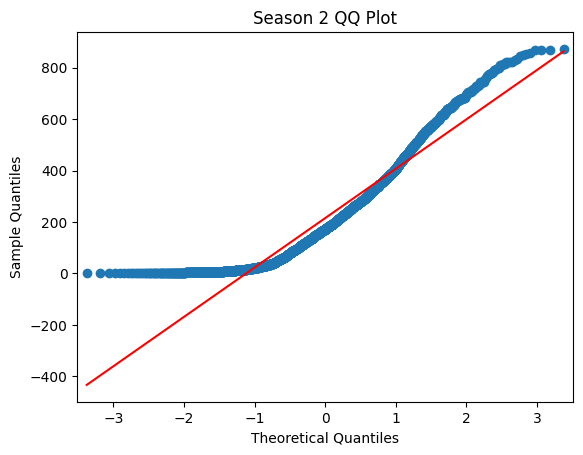

In [154]:
fig=plt.figure(figsize=(4,3))
qqplot(season_2, line='s')
plt.title('Season 2 QQ Plot')
plt.show()

<Figure size 400x300 with 0 Axes>

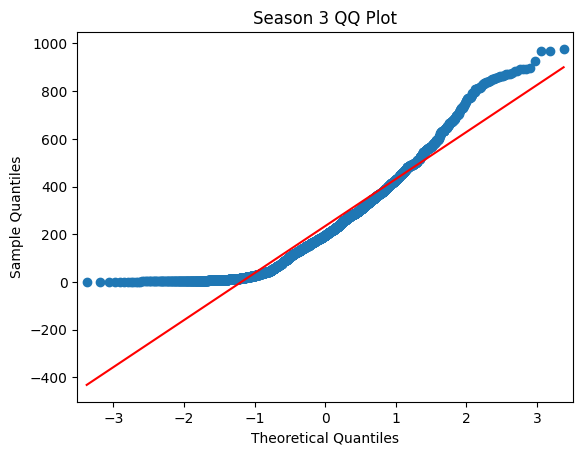

In [155]:
fig=plt.figure(figsize=(4,3))
qqplot(season_3, line='s')
plt.title('Season 3 QQ Plot')
plt.show()

<Figure size 400x300 with 0 Axes>

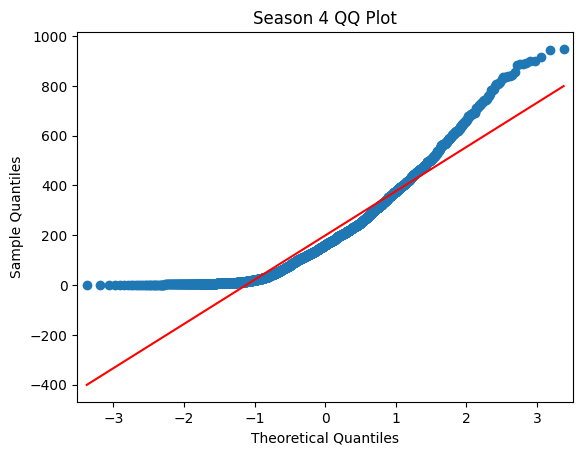

In [156]:
fig=plt.figure(figsize=(4,3))
qqplot(season_4, line='s')
plt.title('Season 4 QQ Plot')
plt.show()

****From above we can say that the data is not guassian

# Shapiro test
---It only works for 50 to 200 samples

In [157]:
#H0: the sample has a Gaussian distribution.
#Ha: the sample does not have a Gaussian distribution.
from scipy.stats import shapiro
season1_samp=season_1.sample(200)
season2_samp=season_2.sample(200)
season3_samp=season_3.sample(200)
season4_samp=season_4.sample(200)
stat,p=shapiro(season1_samp)
print('stat=%.3f, p=%.3f' % (stat, p))
if p >0.05:
    print('Accept H0,Probably  Gaussian')
else:
    print('Reject H0,Probably not Gaussian')

stat=0.824, p=0.000
Reject H0,Probably not Gaussian


In [158]:
#season2
stat,p=shapiro(season2_samp)
print('stat=%.3f, p=%.3f' % (stat, p))
if p <0.05:
    print('Probably not Gaussian')
else:
    print('Probably Gaussian')

stat=0.875, p=0.000
Probably not Gaussian


In [159]:
#season3
stat,p=shapiro(season3_samp)
print('stat=%.3f, p=%.3f' % (stat, p))
if p <0.05:
    print('Probably not Gaussian')
else:
    print('Probably Gaussian')

stat=0.909, p=0.000
Probably not Gaussian


In [160]:
#season4
stat,p=shapiro(season4_samp)
print('stat=%.3f, p=%.3f' % (stat, p))
if p <0.05:
    print('Probably not Gaussian')
else:
    print('Probably Gaussian')

stat=0.933, p=0.000
Probably not Gaussian


## Levene's test
---To check equality of variance between two different samples

In [161]:
#H0: All the samples variances are equal
#H1: At least one variance is different from the rest
stat, p = levene(season_1,season_2,season_3,season_4)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same variances')
else:
    print('Probably at least one variance is different from the rest')

stat=187.771, p=0.000
Probably at least one variance is different from the rest


***Thus from levene test we can conclude that there is a significance difference between there variances

***since the assumptions of Anova test does not followed,so we use kruskal test

In [162]:
#H0:There is no significance difference between the number of cycles rented in different seasons
#Ha:There is a significance difference between the number of cycles rented in different seasons
stat,p=kruskal(season_1,season_2,season_3,season_4)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Accept H0,There is no significance difference between the number of cycles rented in different seasons')
else:
    print('Reject H0,There is a significance difference between the number of cycles rented in different seasons')

stat=699.667, p=0.000
Reject H0,There is a significance difference between the number of cycles rented in different seasons


## 3)Check if no. of cycles rented is similar or different in different weathers

#Anova

### #Test whether data is guassian or not

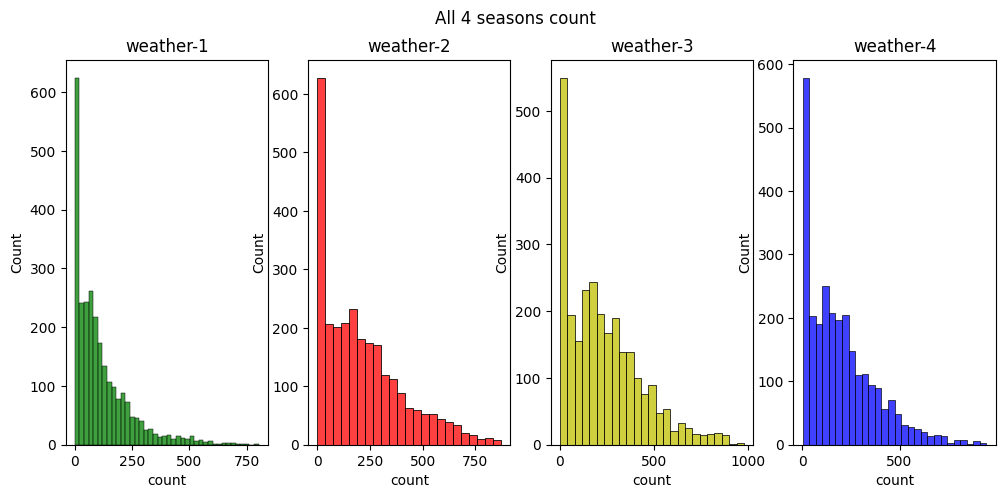

In [178]:
weather_1 = df[df['weather'].str.strip() == 'Clear, Few clouds, partly cloudy']['count']
weather_2 = df[df['weather'].str.strip() == 'Mist + Cloudy, Mist + Broken clouds,Mist + Few clouds,Mist']['count']
weather_3 = df[df['weather'].str.strip() == 'Light Snow,Light Rain + Thunderstorm + Scattered clouds,Light Rain + Scattered clouds']['count']
weather_4 = df[df['weather'].str.strip() == 'Heavy Rain + Ice Pallets + Thunderstorm + Mist,Snow + Fog']['count']
fig=plt.figure(figsize=(12,5))
plt.subplot(1,4,1)
sns.histplot(season_1,color='g')
plt.title('weather-1')
plt.subplot(1,4,2)
sns.histplot(season_2,color='r')
plt.title('weather-2')
plt.subplot(1,4,3)
sns.histplot(season_3,color='y')
plt.title('weather-3')
plt.subplot(1,4,4)
sns.histplot(season_4,color='b')
plt.title('weather-4')
plt.suptitle('All 4 seasons count')
plt.show()

***so from above,the data is not guassian

## Levene's test
---To check equality of variance between two different samples

In [179]:
#H0: All the samples variances are equal
#Ha: At least one variance is different from the rest
stat, p = levene(weather_1,weather_2,weather_3,weather_4)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same variances')
else:
    print('Probably at least one variance is different from the rest')

stat=54.851, p=0.000
Probably at least one variance is different from the rest


***so from above we can conclude that, there is sightly differnece in number of cycles rented in different weathers...

***since the assumptions of Anova test does not followed,so we use kruskal test

In [165]:
#H0:There is no significance difference between the number of cycles rented in different weathers
#Ha:There is a significance difference between the number of cycles rented in different weathers
stat,p=kruskal(weather_1,weather_2,weather_3,weather_4)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Accept H0,There is no significance difference between the number of cycles rented in different weathers')
else:
    print('Reject H0,There is a significance difference between the number of cycles rented in different weathers')

stat=nan, p=nan
Reject H0,There is a significance difference between the number of cycles rented in different weathers


## 4)To Check whether,Weather is dependent on season

# Chi-Square


In [166]:
table=pd.crosstab(df['weather'],df['season'])
table

season,fall,spring,summer,winter
weather,,,,
"Clear, Few clouds, partly cloudy",1930,1759,1801,1702
"Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog",0,1,0,0
"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds",199,211,224,225
"Mist + Cloudy, Mist + Broken clouds,Mist + Few clouds, Mist",604,715,708,807


In [167]:
#H0:Weather is independent on season
#ha:Weather is dependent on season
stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p >0.05:
    print('Accept H0 ,weather is independent on season')
else:
    print('Reject H0,weather is dependent on season')

stat=49.159, p=0.000
Reject H0,weather is dependent on season


***so from above we can conclude that,weather and season are dependent

#Insights

1)**Working Day Influence:** The analysis suggests that the day of the week (working day or non-working day) does not significantly impact the number of electric cycles rented.

2)**Seasonal Variations:** There is a statistically significant difference in the number of cycles rented across different seasons.

3)**Weather Variations:** There is a statistically significant difference in the number of cycles rented across different weathers.

4)**Weather and Season Dependency:** The analysis indicates a dependency between weather conditions and seasonal variations in the demand for shared electric cycles.

# Recommendations

1)**Seasonal Marketing:** Tailor marketing campaigns to highlight benefits during specific seasons.

2)**Dynamic Pricing:** Adjust pricing for peak and off-peak seasons.

3)**Accessories:** Offer weather-appropriate accessories.

4)**Maintenance Planning:** Prioritize cycle maintenance by season.